# Sentiment Analysis on IMDB Movie Reviews

This project analyzes IMDB movie reviews to classify them as **positive** or **negative**.  
The workflow includes:
- Data loading & cleaning
- Exploratory data analysis (EDA)
- Feature engineering
- Machine learning model training
- Evaluation & insights

---


In [96]:
# Import required libraries
import pandas as pd
import re
import nltk
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Data Loading & Inspection
We start by importing the dataset and inspecting its structure.

In [5]:
def wrangle(filepath):

    # To read the dataframe into the memory
    df = pd.read_csv(filepath)

    return df

In [20]:
# load and view the data
df = wrangle(r"C:\Users\User\Desktop\projectComplete\sentiment_analysis\imdb\IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Insight:**  
The dataset contains two columns: `review` (text) and `sentiment` (positive/negative).  


## 2. Data Cleaning & Preprocessing
Raw reviews often contain HTML tags, punctuation, and stopwords.  
We clean the text to make it ready for NLP tasks.


In [43]:
# Download NLTK resouces
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stopwords and Lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean a single review
def clean_text(text):

    # Lowercasing
    text = text.lower()

    # remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # To remove numbers
    text = re.sub(r"\d+", "", text)

    # Tokenization and remove stopwords
    words =text.split()
    words = [word for word in words if word not in stop_words]

    # lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
# Apply the cleaning function
df["cleaned_review"] = df["review"].apply(clean_text)
# Preview the cleaned test
df[["review", "sentiment", "cleaned_review"]].head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## 3. Exploratory Data Analysis (EDA)
We explore the dataset to understand patterns in text and sentiment distribution.


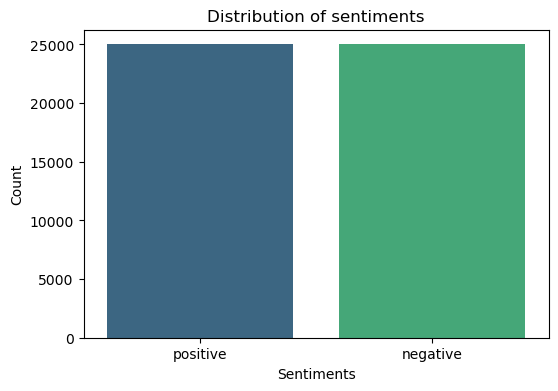

In [45]:
# To view the distribution of the sentiments
plt.figure(figsize = (6,4))
sns.countplot(x="sentiment", data = df, palette='viridis', hue = "sentiment")

# Label axis
plt.xlabel("Sentiments")
plt.ylabel("Count")
# Add a title
plt.title("Distribution of sentiments")
plt.show();


 **Insight:**  
The dataset is balanced, with equal numbers of positive and negative reviews.  


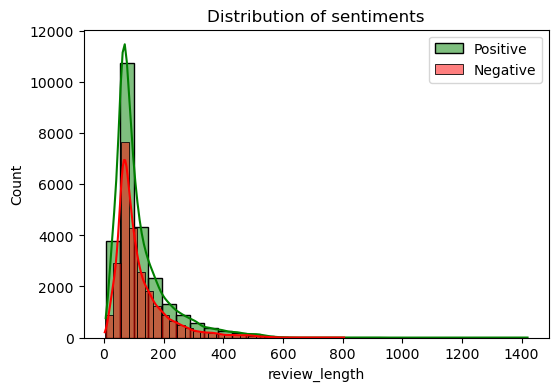

In [52]:
# Review length of distribution of the sentiments
df["review_length"] = df["cleaned_review"].apply(lambda x: len(x.split()))

# Histogram of the sentiments
plt.figure(figsize = (6, 4))
sns.histplot(df[df["sentiment"] == "positive"]["review_length"], color = "green", label="Positive", bins = 30, kde=True)
sns.histplot(df[df["sentiment"] == "negative"]["review_length"], color = "red", label = "Negative", bins = 30, kde = True)

# Add a title
plt.title("Distribution of sentiments")

# Add a legend
plt.legend()
plt.show();


 **Insight:**  
Positive reviews tend to be longer and more descriptive, while negative reviews are shorter and more direct.  


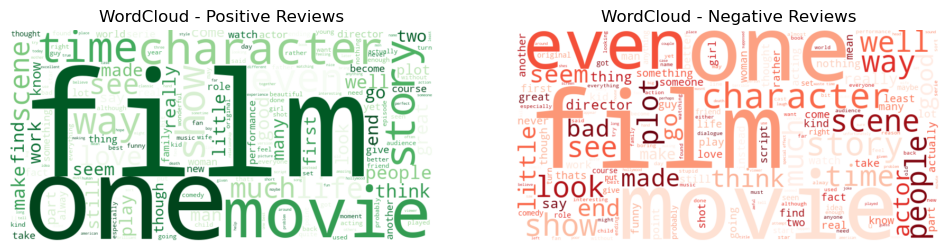

In [55]:
# Wordclouds for positive and negative Reviews
pos_text = " ".join(df[df['sentiment']=='positive']['cleaned_review'])
neg_text = " ".join(df[df['sentiment']=='negative']['cleaned_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)

# Positive review wordcloud suplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Reviews")

# Negative review wordcloud subplot
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Reviews")

plt.show()


In [65]:
# Top 20 used word in the Negative and positive reviews
def get_top_words(corpus, n = 20):
    words = " ".join(corpus).split()

    return Counter(words).most_common(n)

post_top = get_top_words(df[df["sentiment"] == "positive"]["cleaned_review"])
neg_top = get_top_words(df[df["sentiment"] == "negative"]["cleaned_review"])

print(f"Top positive review:\n{post_top}\n")
print(f"Top Negative review:\n{neg_top}")

Top positive review:
[('film', 47892), ('movie', 43133), ('one', 26958), ('like', 17541), ('time', 15197), ('good', 14419), ('story', 13647), ('character', 13628), ('great', 12694), ('see', 12532), ('get', 11095), ('well', 11078), ('make', 10988), ('really', 10676), ('also', 10553), ('would', 10368), ('scene', 9693), ('show', 9411), ('even', 9365), ('life', 9138)]

Top Negative review:
[('movie', 55889), ('film', 41909), ('one', 25715), ('like', 22248), ('even', 14920), ('time', 14196), ('good', 14196), ('bad', 14095), ('character', 13943), ('would', 13633), ('get', 13338), ('make', 12576), ('really', 12224), ('scene', 11013), ('see', 10962), ('story', 10580), ('dont', 10013), ('much', 9898), ('people', 9342), ('thing', 9230)]


## 4. Feature Engineering
We transform text into numerical features (TF-IDF, word embeddings) to train models.

In [70]:
# Initiaalize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features = 5_000)

# Fit andtransform clean reviews
X = vectorizer.fit_transform(df["cleaned_review"])

# Target variable
y = df["sentiment"].map(
    {
        "positive": 1,
        "negative": 0
    }
)

# Check the shape
print("Feature matrix shape:", X.shape)

Feature matrix shape: (50000, 5000)


In [76]:
# Get feature names(words) from TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Separate negative and positive reviews
positive_reviews = df[df["sentiment"] == "positive"]["cleaned_review"]
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# To TF-IDF separately for each group
pos_vec = vectorizer.fit_transform(positive_reviews)
neg_vec = vectorizer.fit_transform(negative_reviews)

# Mean TF-IDF score for each word
pos_mean = np.asarray(pos_vec.mean(axis = 0)).ravel()
neg_mean = np.asarray(neg_vec.mean(axis=0)).ravel()

# Top 20 words
top_pos_idx = pos_mean.argsort()[-20:][::-1]
top_neg_idx = neg_mean.argsort()[-20:][::-1]

top_pos_words = [(feature_names[i], pos_mean[i]) for i in top_pos_idx]
top_neg_words = [(feature_names[i], neg_mean[i]) for i in top_neg_idx]

## Visualization

C:\Users\User\AppData\Local\Temp\ipykernel_24412\139038500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tfidf", y="word", data=pos_df, ax=axes[0], palette="Greens_r")
C:\Users\User\AppData\Local\Temp\ipykernel_24412\139038500.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tfidf", y="word", data=neg_df, ax=axes[1], palette="Reds_r")


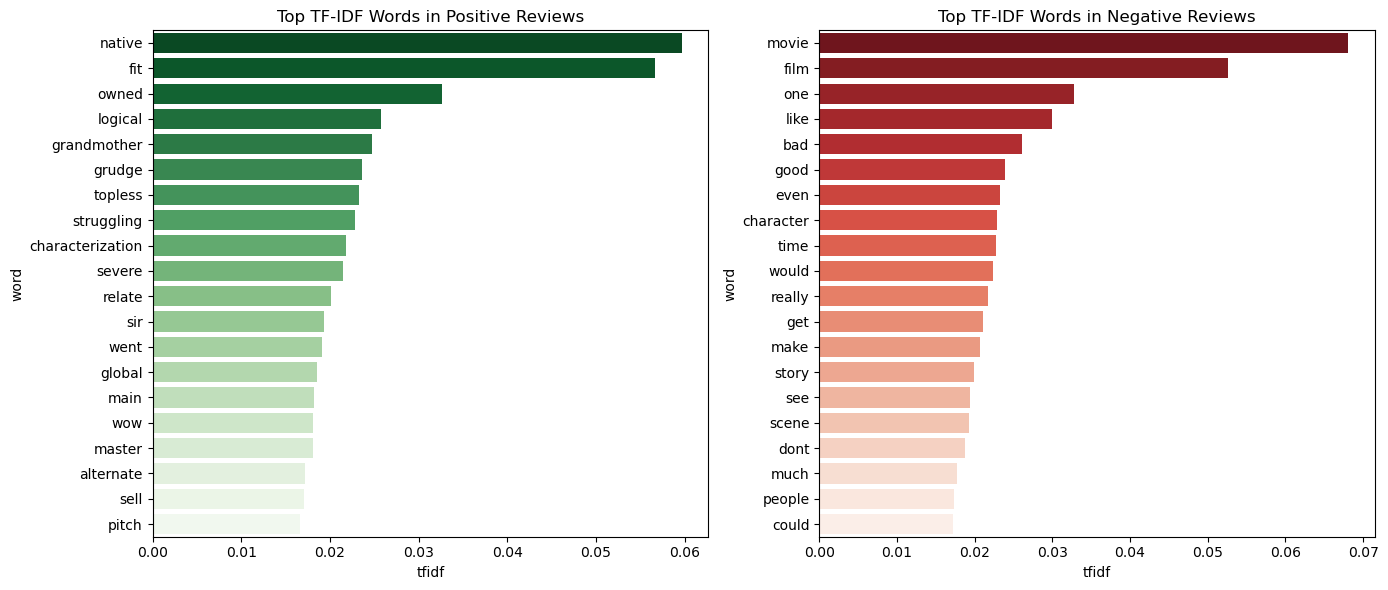

In [92]:
# Create a DataFrame of the top words
pos_df = pd.DataFrame(top_pos_words, columns=["word", "tfidf"])
neg_df = pd.DataFrame(top_neg_words, columns=["word", "tfidf"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive words
sns.barplot(x="tfidf", y="word", data=pos_df, ax=axes[0], palette="Greens_r")
axes[0].set_title("Top TF-IDF Words in Positive Reviews")

# Negative words
sns.barplot(x="tfidf", y="word", data=neg_df, ax=axes[1], palette="Reds_r")
axes[1].set_title("Top TF-IDF Words in Negative Reviews")

plt.tight_layout()
plt.show()


## Modelling

In [99]:
# Train Test Split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =  42, stratify = y)

# Train Logistic Regression model
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

# Pediction
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy score: 0.8862
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Confusion matrix(Visualization)**

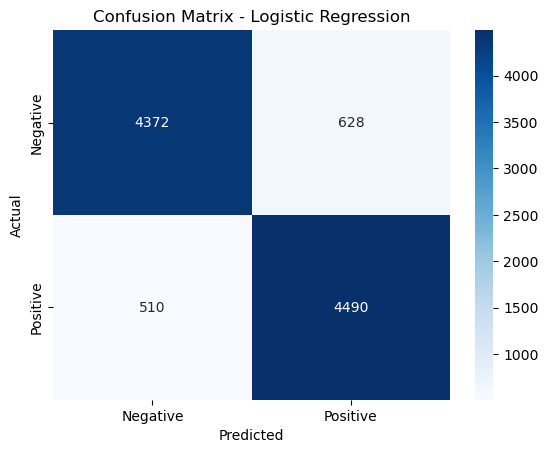

In [107]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

# Label Axis
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add a title
plt.title("Confusion Matrix - Logistic Regression")
plt.show();